In [77]:
import pandas as pd
import matplotlib.pyplot as plt

Carichiamo il nostro dataset, controllando che venga stampato correttamente.

In [2]:
df = pd.read_csv("./vgsales.csv")
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


Riportiamo il numero di istanze non nulle e il loro data-type.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Visualizziamo chiaramente il numero di valori mancanti per feature.
Possiamo vedere che la percentuale di valori nulli è bassa, rendendo il dataset da noi scelto relativamente completo.

In [4]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [5]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Significato delle Feature

- **`Rank`** indica il punteggio del gioco in base a un sistema di ranking basato sulle vendite complessive
- **`Name`** indica il nome del gioco
- **`Platform`** indica la piattaforma su cui è stato rilasciato il gioco
- **`Year`** indica l'anno in cui è stato pubblicato il gioco
- **`Genre`** indica il genere del gioco
- **`Publisher`** indica l'azienda che ha pubblicato il gioco
- **`NA_Sales`** indica il numero di copie vendute in nord America (in milioni)
- **`EU_Sales`** indica il numero di copie vendute in Europa (in milioni)
- **`JP_Sales`** indica il numero di copie vendute in Giappone (in milioni)
- **`Other_Sales`** indica il numero di copie vendute nel resto del mondo (in milioni)
- **`Global_Sales`** indica il numero complessivo di copie vendute (in milioni)

Visualizziamo quali piattaforme, generi e anni di pubblicazione prende in considerazione il dataset.

In [6]:
df["Platform"].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [7]:
df["Genre"].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [8]:
df["Year"].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2003., 1986., 2000.,   nan, 1995., 2016., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

Il dataset non è dei più recenti, in quanto si ferma al 2017.
Da allora sono uscite altre piattaforme che hanno registrato vendite importanti (e.g: Nintendo Switch, PS5).

Controlliamo la presenza di dati duplicati.

In [9]:
df.duplicated().sum()

0

Sembra che ogni riga sia unica.
Ora controlliamo se il nome di alcuni giochi appare più volte.

In [10]:
df.duplicated(subset='Name').sum()

5105

In [11]:
# Ottengo tutti i titoli duplicati
duplicated_titles = df[df.duplicated(subset='Name', keep=False)]

# Stampo i titoli duplicati
unique_duplicated_titles = duplicated_titles['Name'].unique()
print("Titoli duplicati unici:")
print(unique_duplicated_titles)


Titoli duplicati unici:
['Super Mario Bros.' 'Tetris' 'Grand Theft Auto V' ...
 'Sakura-Sou no Pet na Kanojo' 'Heart no Kuni no Alice'
 'Akatsuki no Goei Trinity']


In [12]:
# Ottengo i titoli duplicati e le loro rispettive piattaforme
duplicated_games_with_platforms = df[df.duplicated(subset='Name', keep=False)]

# Conto il numero totale di righe trovate
total_rows_found = duplicated_games_with_platforms.shape[0]  

# Raggruppo per Name, aggrego le piattaforme in una lista e conto quante volte appaiono
platforms_and_counts = duplicated_games_with_platforms.groupby('Name').agg(
    Platforms=('Platform', list),
    Count=('Platform', 'size')  # Count occurrences
)

# Sorting discendente
sorted_platforms_and_counts = platforms_and_counts.sort_values(by='Count', ascending=False)

print("Numero totale righe per giochi duplicati:", total_rows_found)
print("\nGiochi duplicati, piattaforme e conteggio:")
print(sorted_platforms_and_counts)


Numero totale righe per giochi duplicati: 7880

Giochi duplicati, piattaforme e conteggio:
                                                                             Platforms  \
Name                                                                                     
Need for Speed: Most Wanted          [PS2, PS3, X360, X360, PSV, XB, GC, PC, WiiU, ...   
Madden NFL 07                              [PS2, X360, XB, PSP, GC, PS3, Wii, DS, GBA]   
FIFA 14                                 [PS3, X360, PS4, XOne, PSV, PC, Wii, 3DS, PSP]   
Ratatouille                                [DS, PS2, PSP, PS3, Wii, X360, GBA, GC, PC]   
LEGO Marvel Super Heroes                [X360, PS3, PS4, XOne, 3DS, WiiU, PSV, DS, PC]   
...                                                                                ...   
Mortal Kombat Trilogy                                                        [PS, N64]   
Mortal Kombat Mythologies: Sub-Zero                                          [PS, N64]   
Mortal Ko

I titoli di molti giochi appaiono più volte in quanto pubblicati su diverse piattaforme.

In [13]:
# Raggruppa per genere e ottiene l'index del gioco con il maggior numero di vendite
most_sales_per_genre = df.loc[df.groupby('Genre')['Global_Sales'].idxmax()]

print("Giochi con maggior numero di vendite per genere:")
print(most_sales_per_genre)

Giochi con maggior numero di vendite per genere:
     Rank                                Name Platform    Year         Genre  \
16     17                  Grand Theft Auto V      PS3  2013.0        Action   
50     51  Super Mario Land 2: 6 Golden Coins       GB  1992.0     Adventure   
39     40             Super Smash Bros. Brawl      Wii  2008.0      Fighting   
7       8                            Wii Play      Wii  2006.0          Misc   
1       2                   Super Mario Bros.      NES  1985.0      Platform   
5       6                              Tetris       GB  1989.0        Puzzle   
2       3                      Mario Kart Wii      Wii  2008.0        Racing   
4       5            Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing   
9      10                           Duck Hunt      NES  1984.0       Shooter   
10     11                          Nintendogs       DS  2005.0    Simulation   
0       1                          Wii Sports      Wii  2006.0        S

In [14]:
sales_by_game = df.groupby("Name").sum(numeric_only=True)

top_sold_by_region = pd.DataFrame({
    "Top Game": {
        region: sales_by_game[region].idxmax()
        for region in ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
    },
    "Sales": {
        region: sales_by_game[region].max()
        for region in ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]
    }
})

top_sold_by_region


,Top Game,Sales
NA_Sales,Wii Sports,41.49
EU_Sales,Wii Sports,29.02
JP_Sales,Pokemon Red/Pokemon Blue,10.22
Other_Sales,Grand Theft Auto: San Andreas,10.72
Global_Sales,Wii Sports,82.74


<Axes: title={'center': 'Global Video Game Sales Over Time'}, xlabel='Year', ylabel='Global Sales (millions)'>

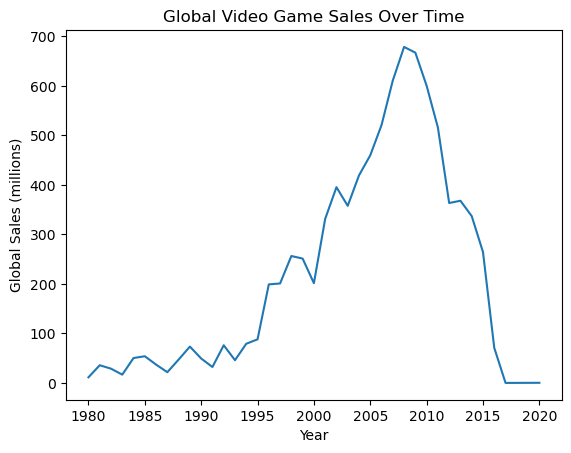

In [15]:
sales_over_time = (
    df.groupby("Year")
      .sum(numeric_only=True)
)

sales_over_time["Global_Sales"].plot(
    kind="line",
    title="Global Video Game Sales Over Time",
    xlabel="Year",
    ylabel="Global Sales (millions)"
)

In [16]:
sales_by_year = (
    df.groupby("Year")
      .sum(numeric_only=True)
)

peak_year = int(sales_by_year["Global_Sales"].idxmax())
peak_sales = sales_by_year["Global_Sales"].max()

print(f"Le maggior vendite di videogiochi a livello globale sono avvenute nel {peak_year} con {peak_sales:.2f} vendite")


Le maggior vendite di videogiochi a livello globale sono avvenute nel 2008 con 678.90 vendite


<Axes: title={'center': 'NA Video Game Sales Over Time'}, xlabel='Year', ylabel='North America Sales (millions)'>

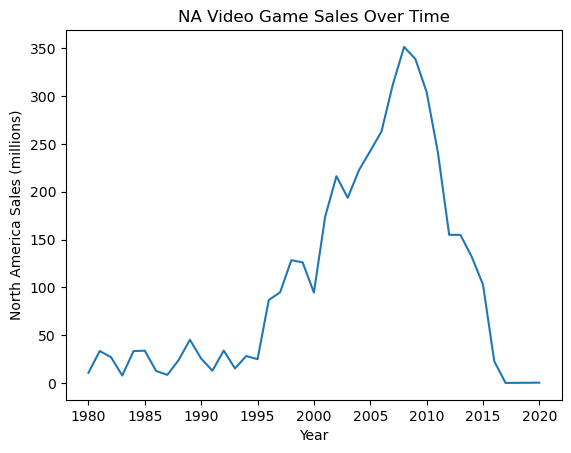

In [17]:
sales_over_time = (
    df.groupby("Year")
      .sum(numeric_only=True)
)

sales_over_time["NA_Sales"].plot(
    kind="line",
    title="NA Video Game Sales Over Time",
    xlabel="Year",
    ylabel="North America Sales (millions)"
)

In [18]:
sales_by_year = (
    df.groupby("Year")
      .sum(numeric_only=True)
)

peak_year = int(sales_by_year["NA_Sales"].idxmax())
peak_sales = sales_by_year["NA_Sales"].max()

print(f"Le maggior vendite di videogiochi in NA sono avvenute nel {peak_year} con {peak_sales:.2f} vendite")


Le maggior vendite di videogiochi in NA sono avvenute nel 2008 con 351.44 vendite


<Axes: title={'center': 'JP Video Game Sales Over Time'}, xlabel='Year', ylabel='Japanese Sales (millions)'>

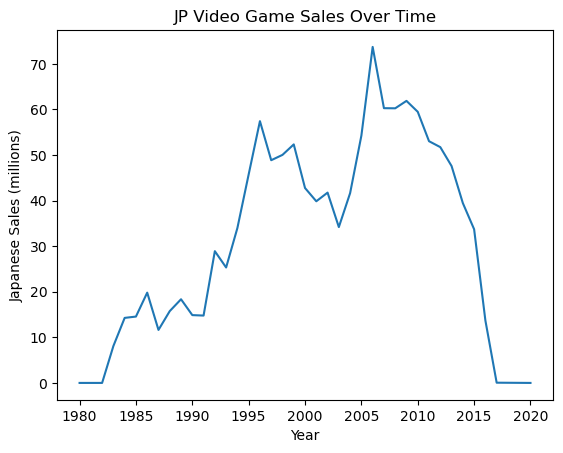

In [19]:
sales_over_time = (
    df.groupby("Year")
      .sum(numeric_only=True)
)

sales_over_time["JP_Sales"].plot(
    kind="line",
    title="JP Video Game Sales Over Time",
    xlabel="Year",
    ylabel="Japanese Sales (millions)"
)

In [20]:
sales_by_year = (
    df.groupby("Year")
      .sum(numeric_only=True)
)

peak_year = int(sales_by_year["JP_Sales"].idxmax())
peak_sales = sales_by_year["JP_Sales"].max()

print(f"Le maggior vendite di videogiochi in JP sono avvenute nel {peak_year} con {peak_sales:.2f} vendite")


Le maggior vendite di videogiochi in JP sono avvenute nel 2006 con 73.73 vendite


In [82]:
df[df['Year'] == 2017]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14390,14393,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.0,0.0,0.03,0.0,0.03
16241,16244,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.0,0.0,0.01,0.0,0.01
16438,16441,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.0,0.0,0.01,0.0,0.01


Facciamo un confronto anno per anno delle vendite in Giappone.

In [76]:
yearly_sales = df.groupby('Year').agg(
    JP_Sales=('JP_Sales', 'sum'),
    NA_Sales=('NA_Sales', 'sum'),
    EU_Sales=('EU_Sales', 'sum')
).reset_index()

yearly_sales

,Year,JP_Sales,NA_Sales,EU_Sales
0,1980.0,0.00,10.59,0.67
1,1981.0,0.00,33.40,1.96
2,1982.0,0.00,26.92,1.65
3,1983.0,8.10,7.76,0.80
4,1984.0,14.27,33.28,2.10
5,1985.0,14.56,33.73,4.74
6,1986.0,19.81,12.50,2.84
7,1987.0,11.63,8.46,1.41
8,1988.0,15.76,23.87,6.59
9,1989.0,18.36,45.15,8.44


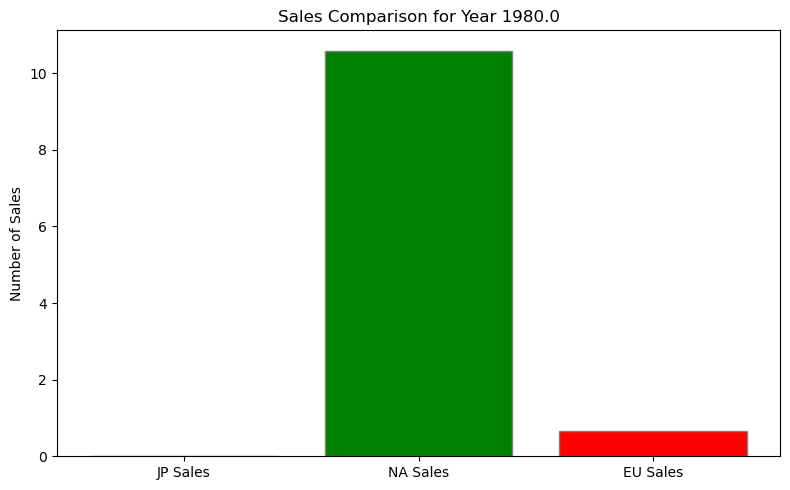

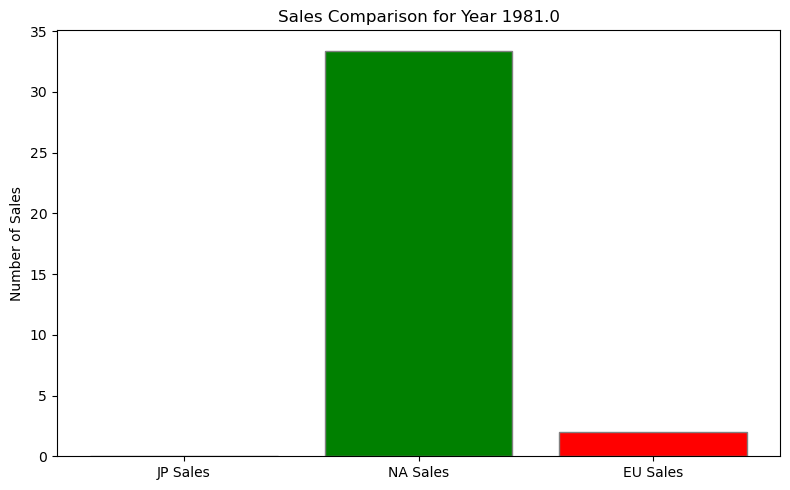

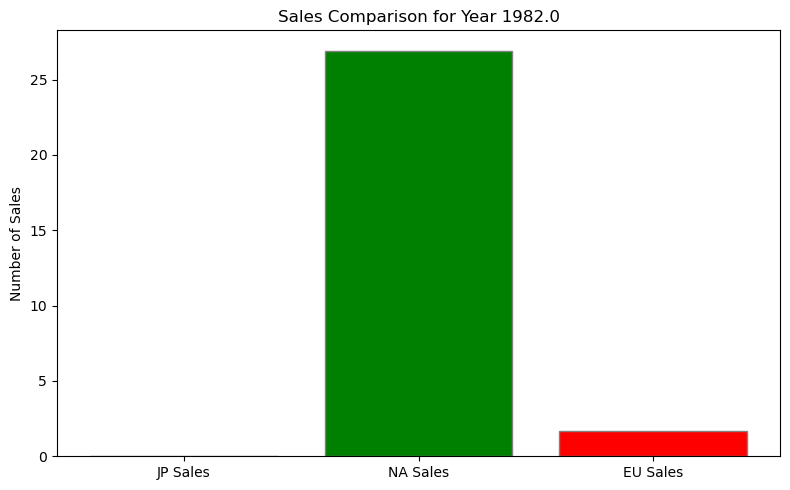

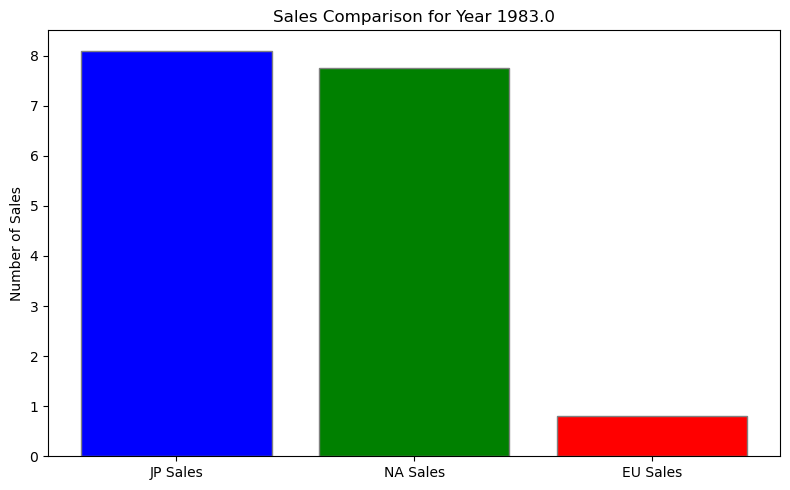

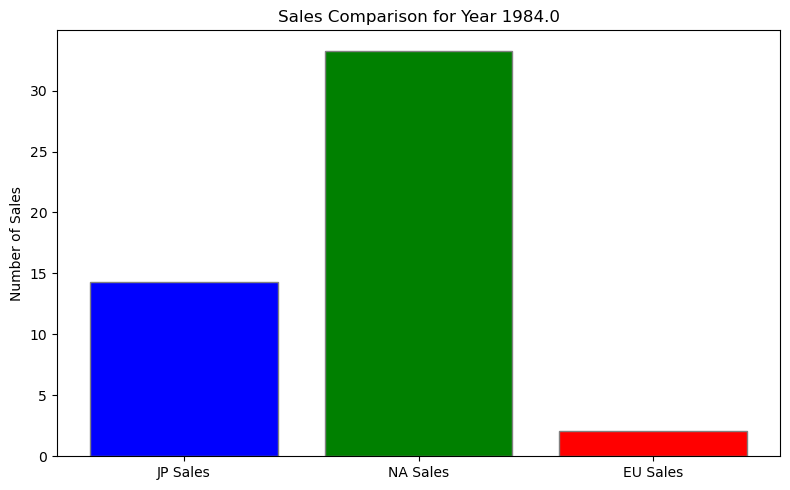

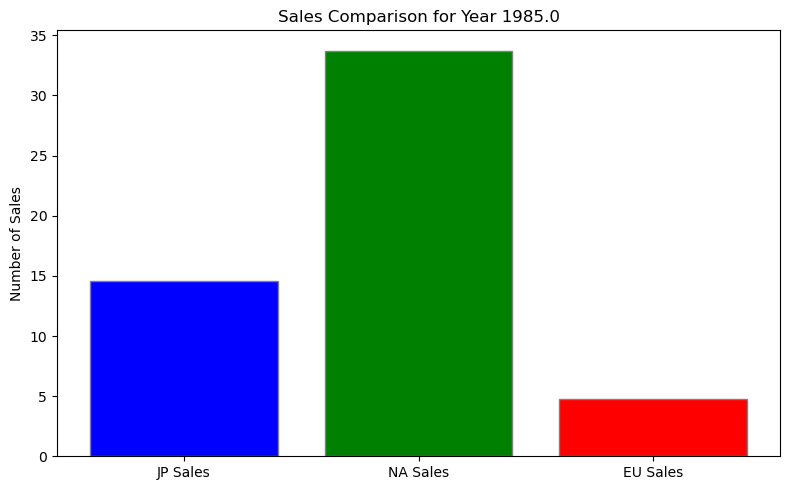

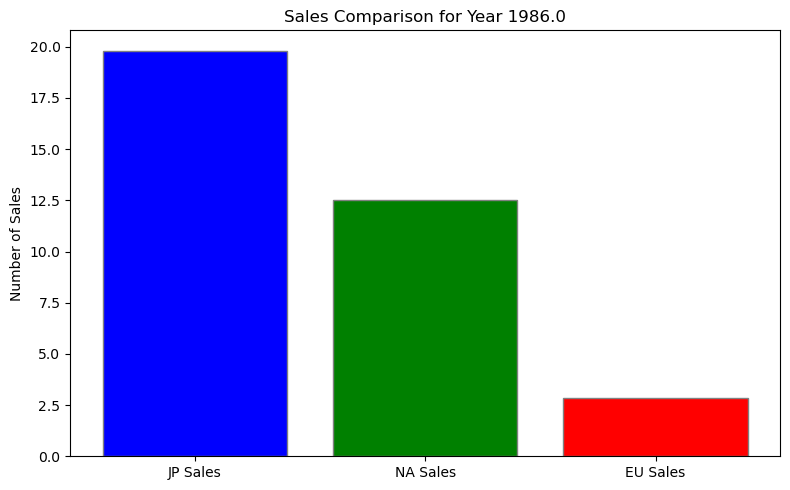

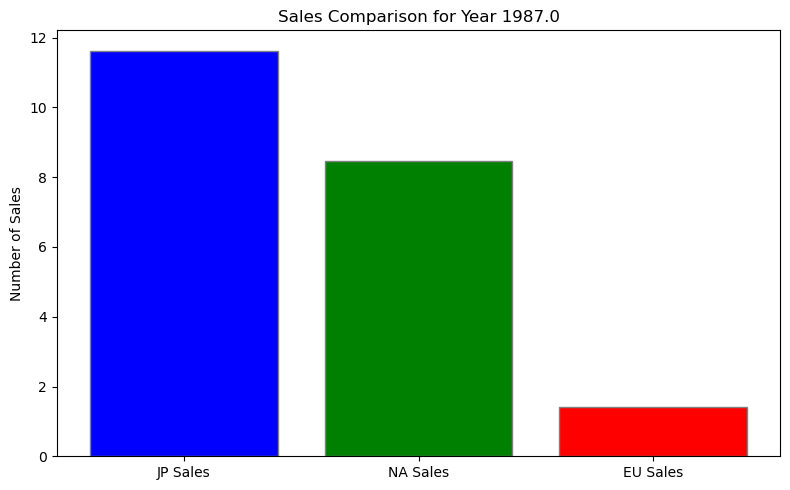

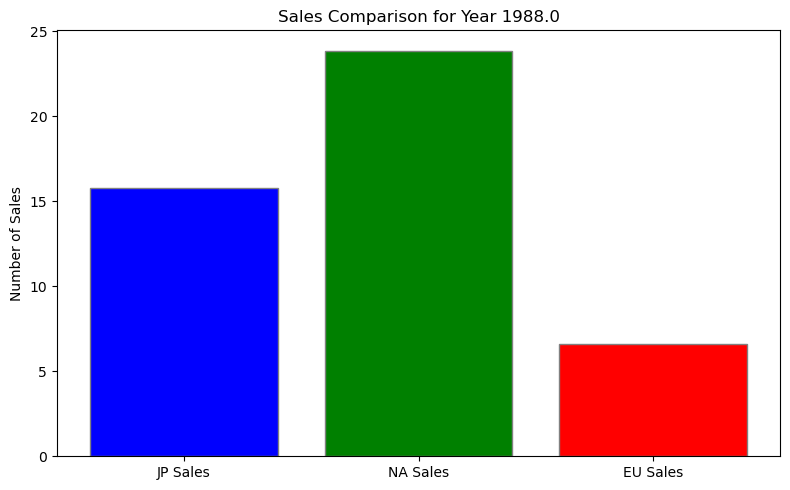

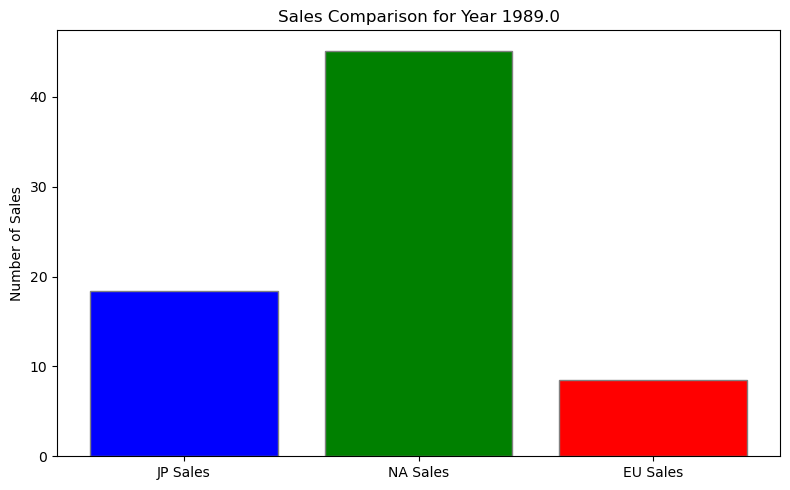

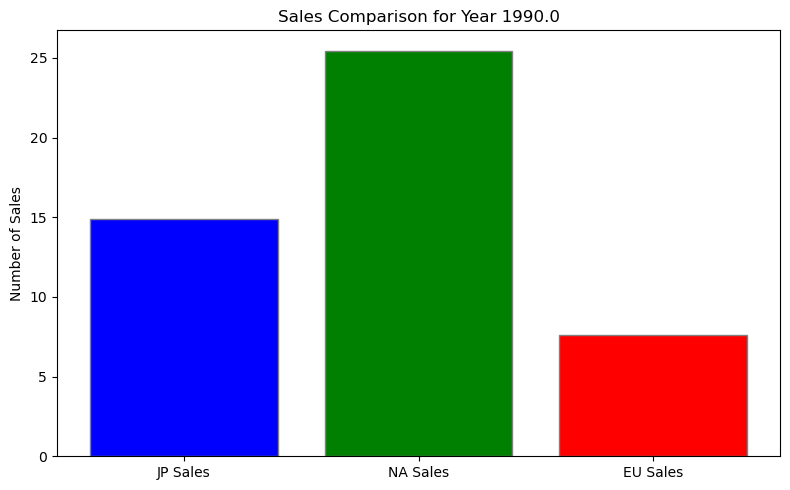

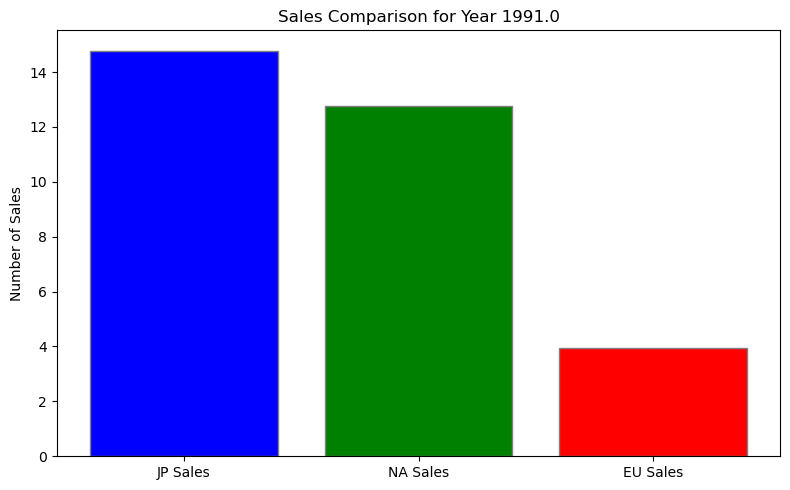

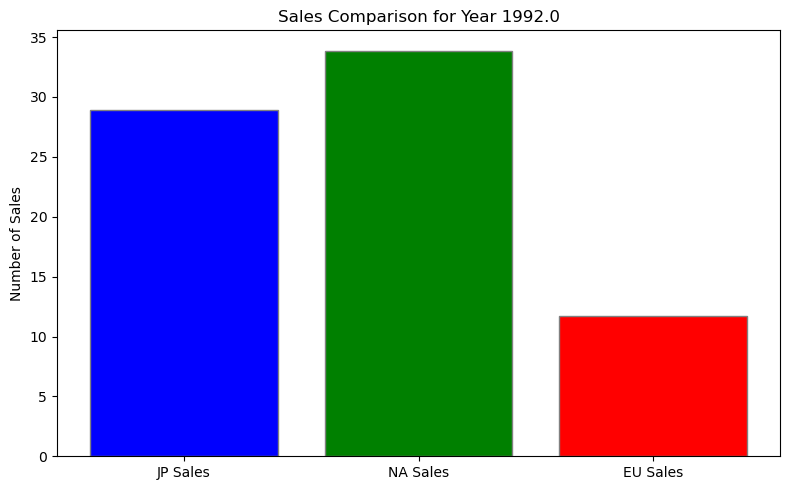

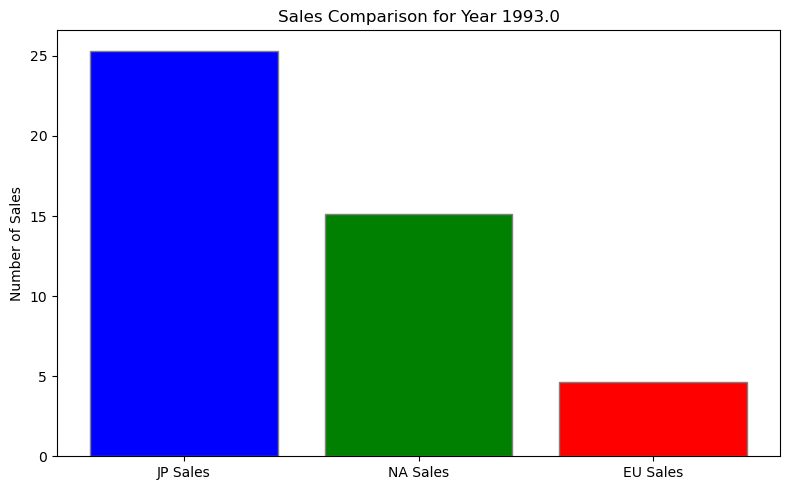

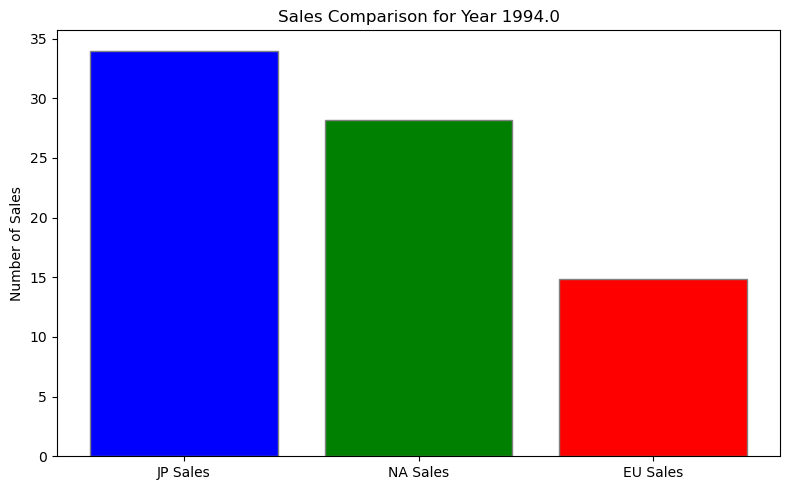

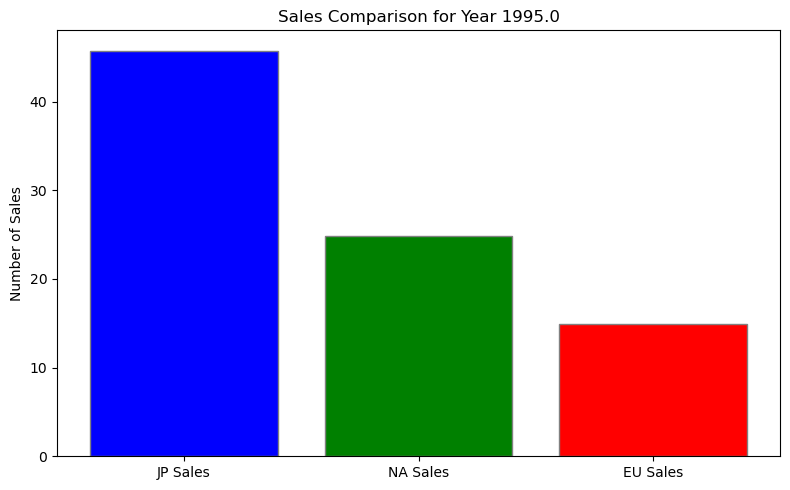

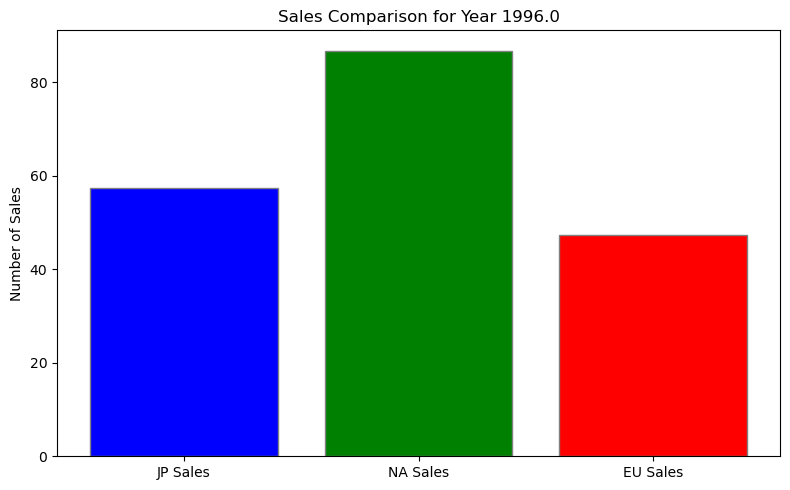

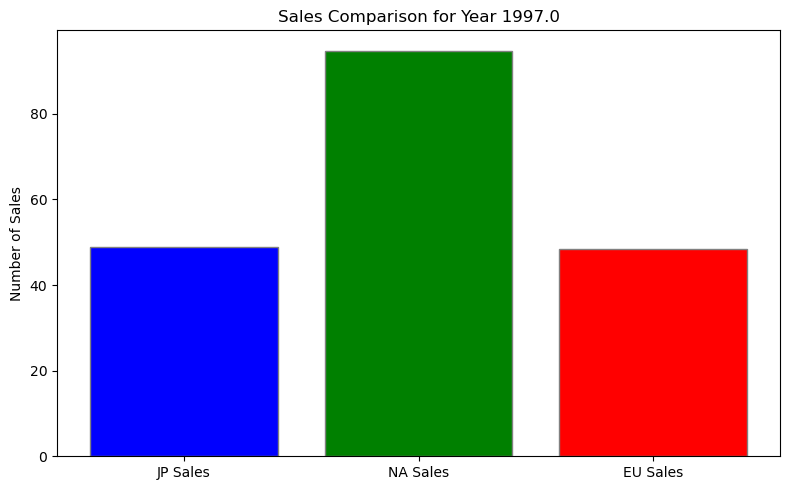

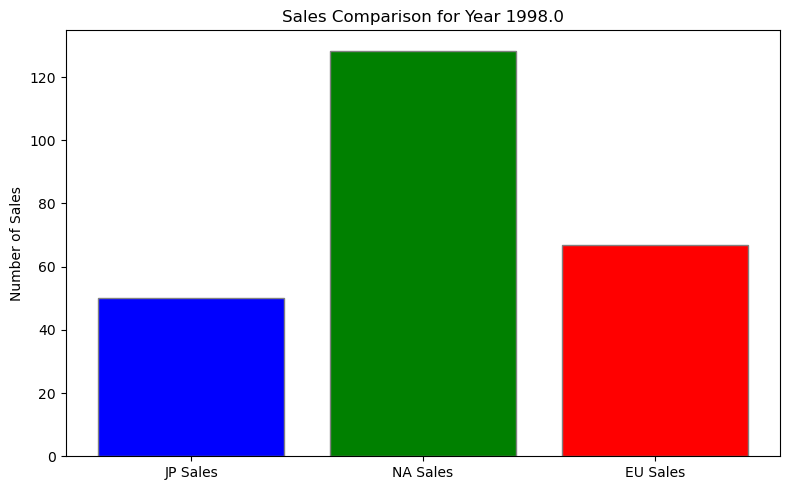

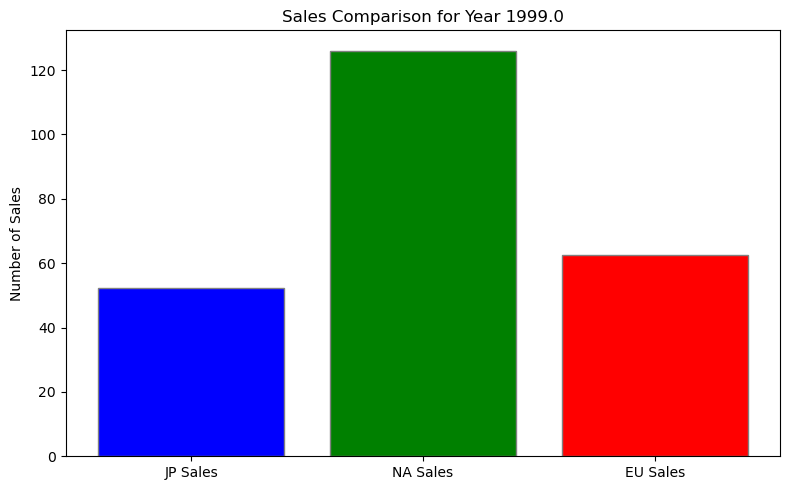

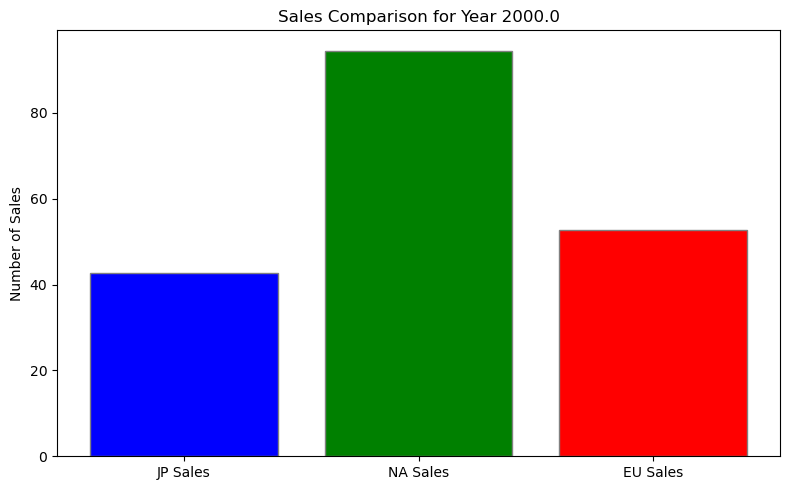

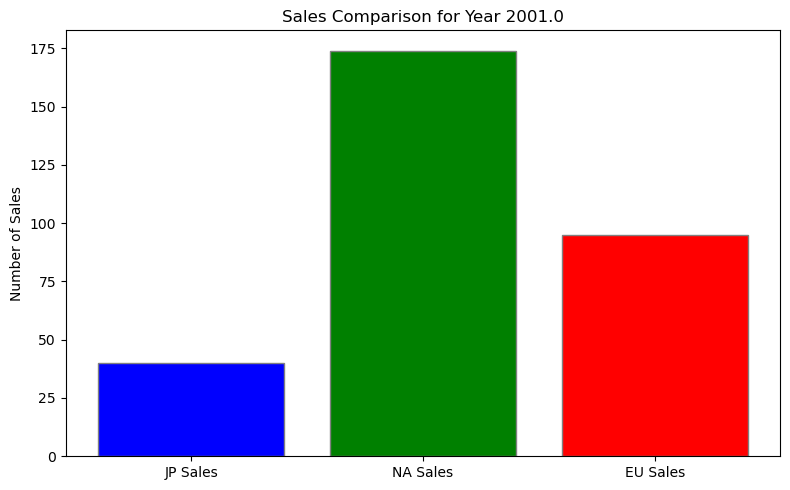

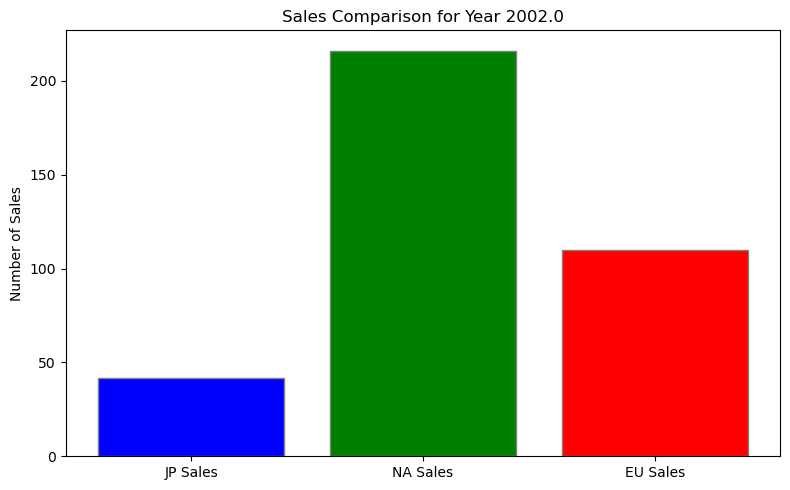

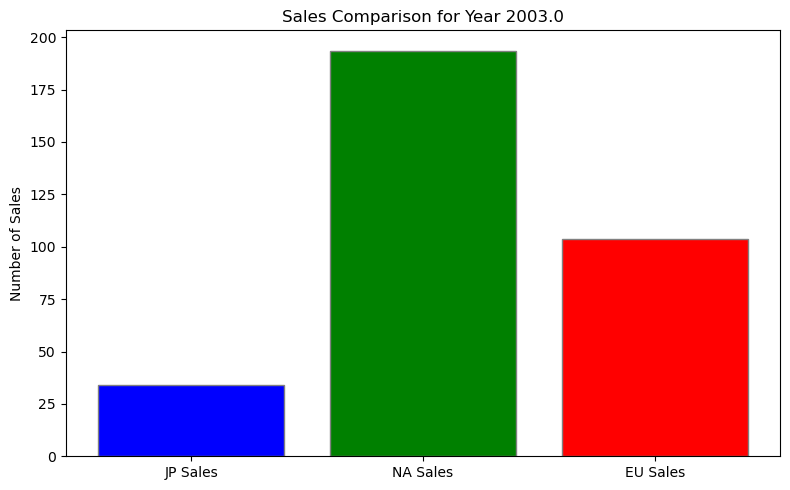

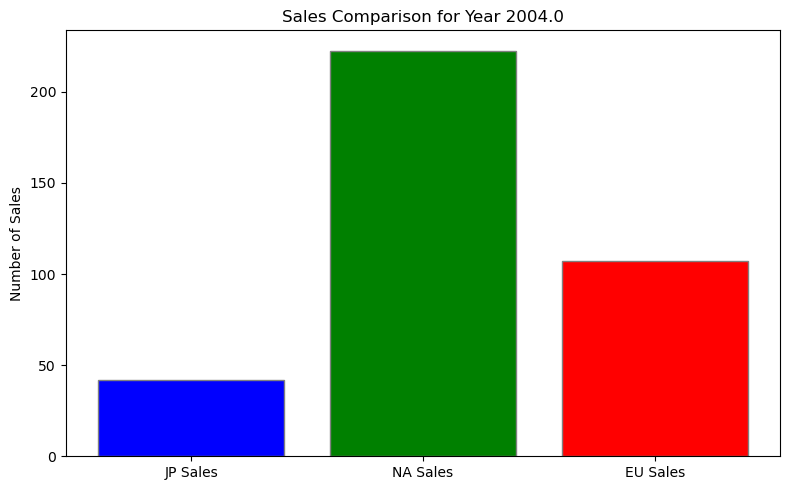

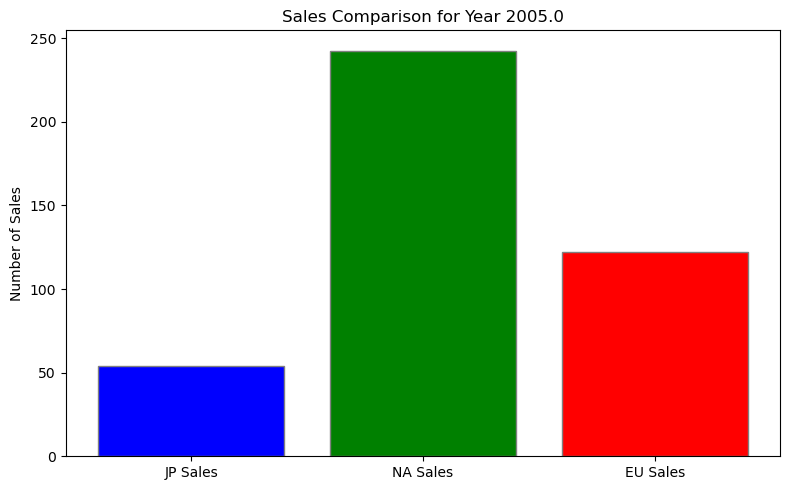

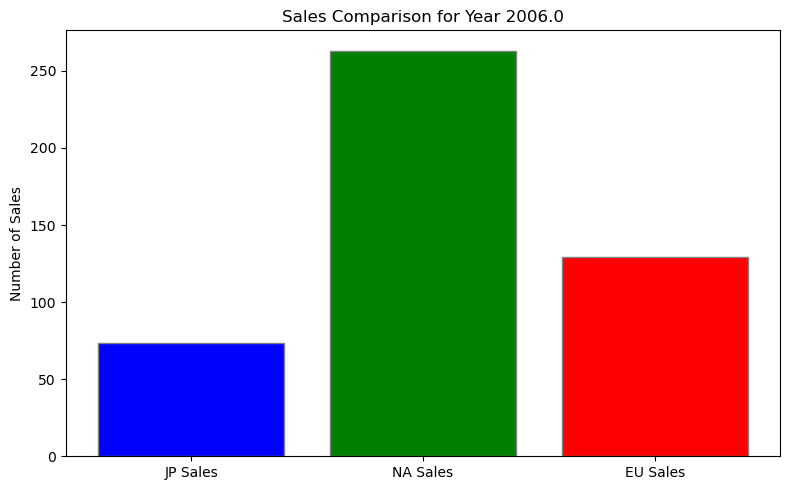

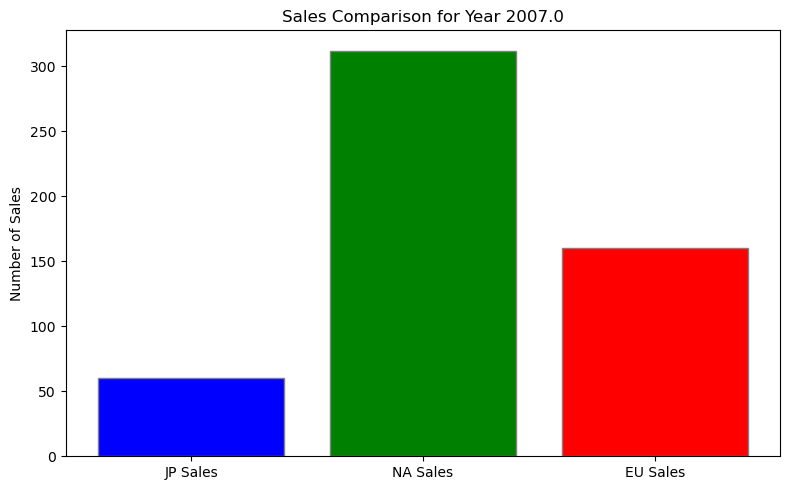

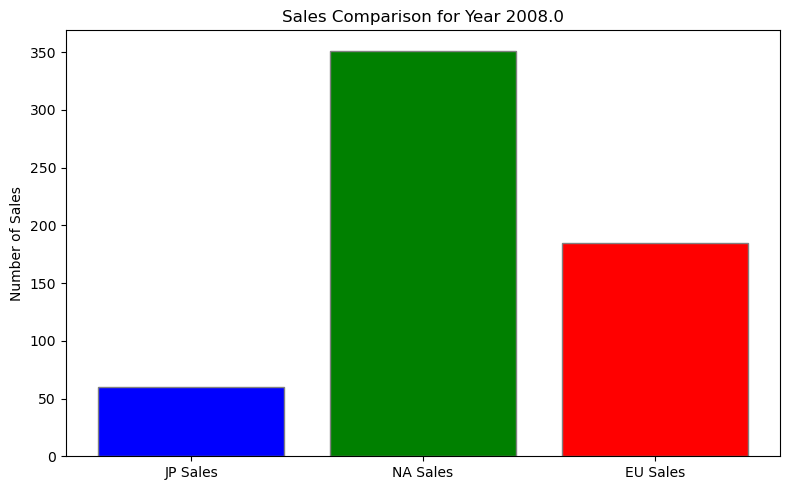

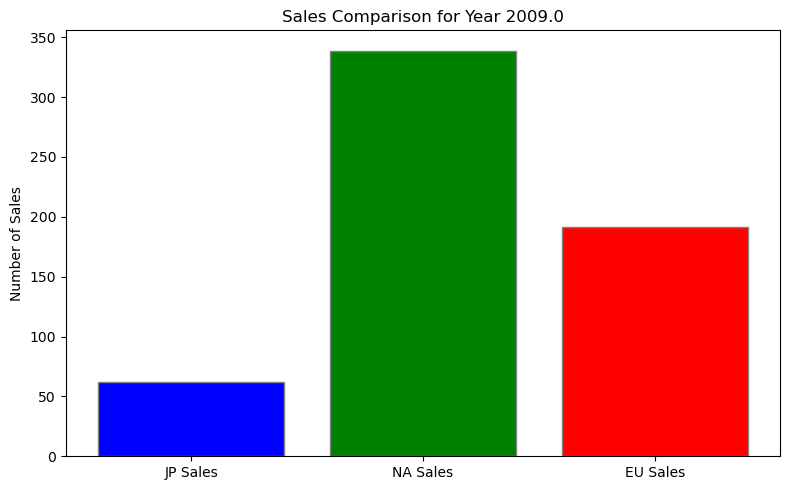

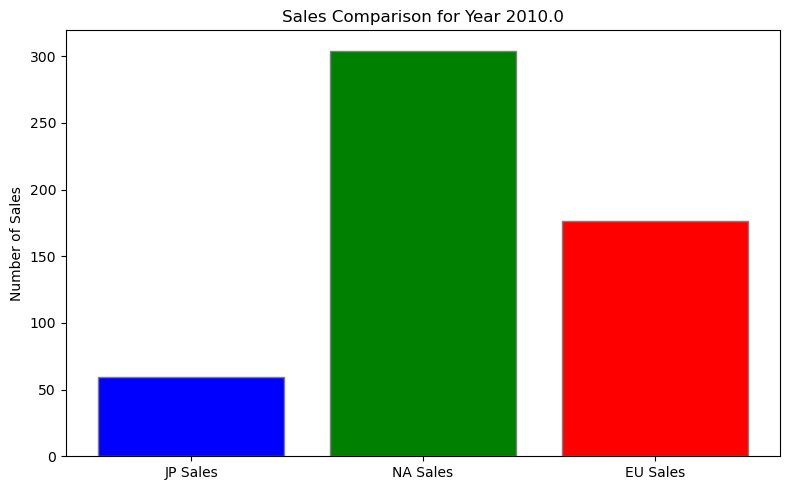

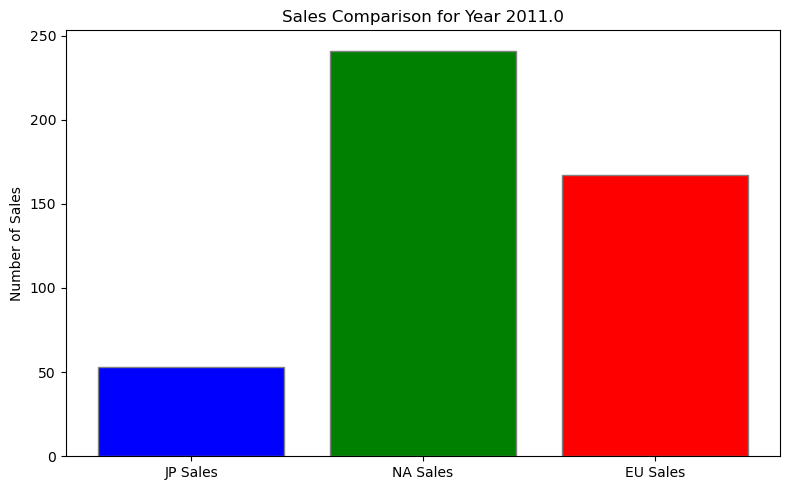

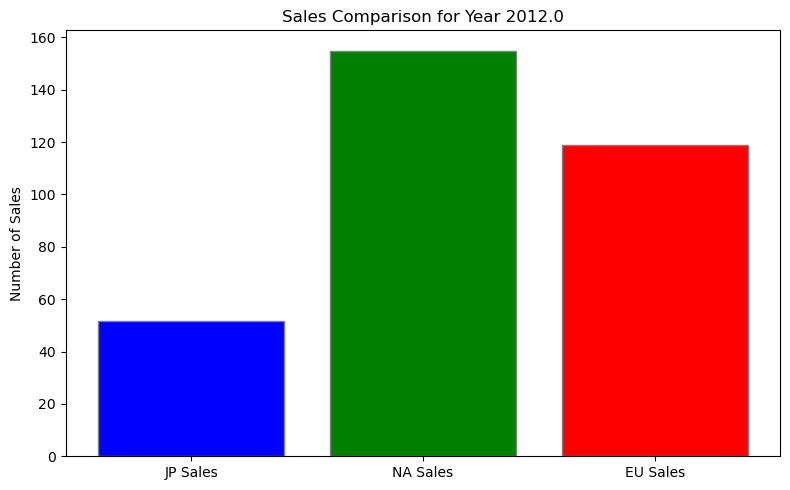

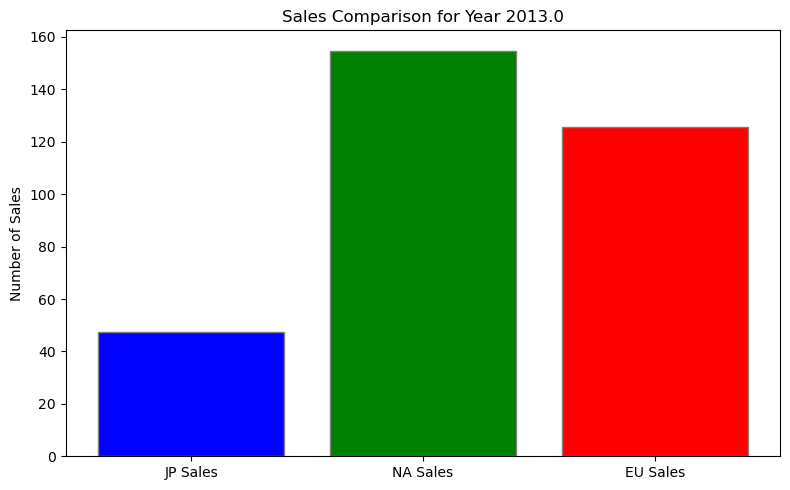

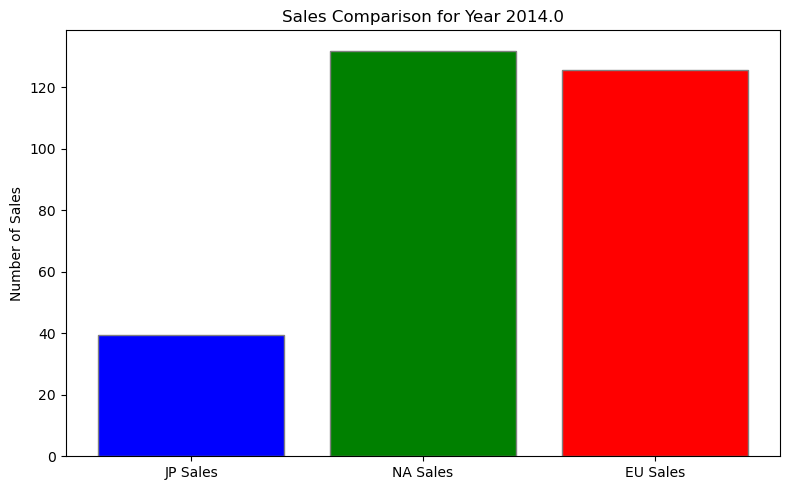

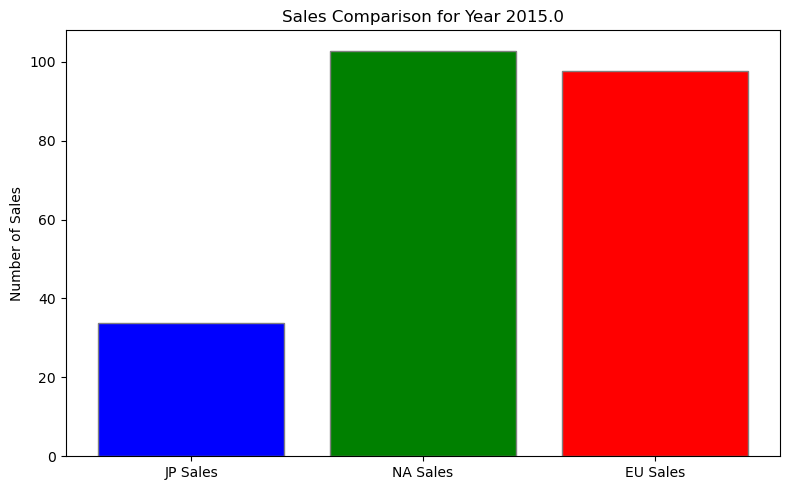

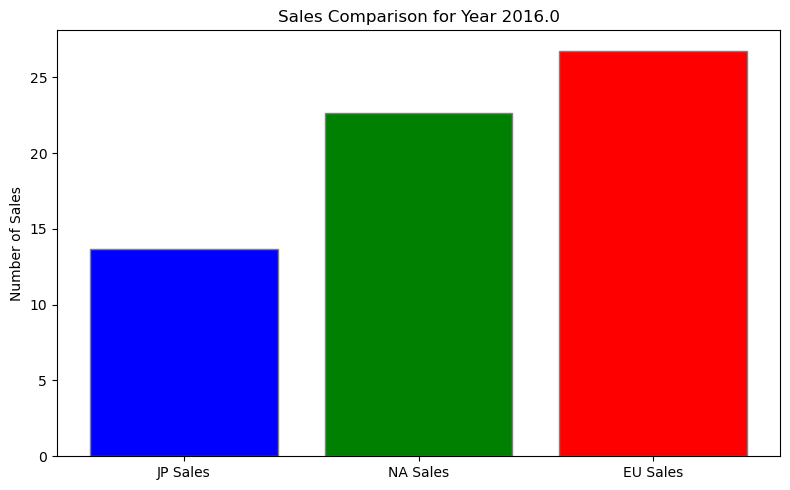

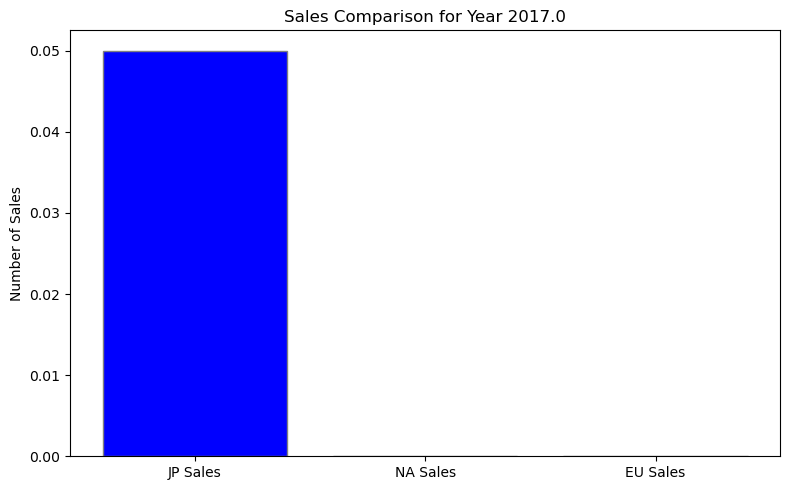

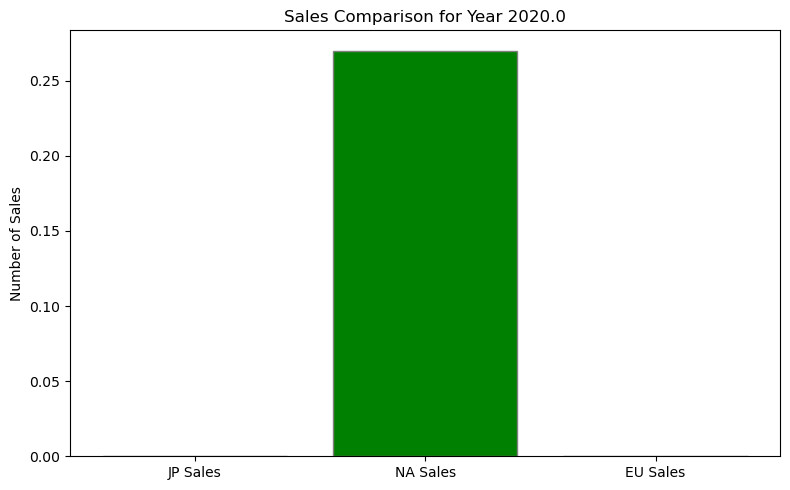

In [80]:
# Create individual graphs for each year
for index, row in yearly_sales.iterrows():
    plt.figure(figsize=(8, 5))  # Adjust the figure size as needed
    sales = [row['JP_Sales'], row['NA_Sales'], row['EU_Sales']]
    labels = ['JP Sales', 'NA Sales', 'EU Sales']
    
    plt.bar(labels, sales, color=['blue', 'green', 'red'], edgecolor='grey')
    
    # Add labels and title
    plt.title(f'Sales Comparison for Year {row["Year"]}')
    plt.ylabel('Number of Sales')
    
    # Show the plot for each year
    plt.tight_layout()
    plt.show()

In [22]:
df.groupby("Publisher")["Global_Sales"].sum().sort_values(ascending=False)

Publisher
Nintendo                       1786.56
Electronic Arts                1110.32
Activision                      727.46
Sony Computer Entertainment     607.50
Ubisoft                         474.72
                                ...   
Ongakukan                         0.01
Commseed                          0.01
Takuyo                            0.01
Boost On                          0.01
Naxat Soft                        0.01
Name: Global_Sales, Length: 578, dtype: float64

In [23]:
df.groupby("Publisher")["JP_Sales"].sum().sort_values(ascending=False)

Publisher
Nintendo                        455.42
Namco Bandai Games              127.07
Konami Digital Entertainment     91.30
Sony Computer Entertainment      74.10
Capcom                           68.08
                                 ...  
Jester Interactive                0.00
Jack of All Games                 0.00
Ivolgamus                         0.00
Introversion Software             0.00
responDESIGN                      0.00
Name: JP_Sales, Length: 578, dtype: float64

In [24]:
df[df["Publisher"] == "Nintendo"]["Name"].count()

703

In [25]:
df.groupby("Publisher")["Name"].count().sort_values(ascending=False)

Publisher
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Playmates                          1
Playmore                           1
Plenty                             1
Pony Canyon                        1
SCS Software                       1
Name: Name, Length: 578, dtype: int64

In [26]:
df.groupby("Platform")["Global_Sales"].sum().sort_values(ascending=False)

Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
2600      97.08
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64

In [27]:
df.groupby("Platform")["Name"].count().sort_values(ascending=False)

Platform
DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Name, dtype: int64

In [28]:
most_sold_games = (df.groupby("Name")
    .agg(Platform_Count=("Platform", "nunique"),Global_Sales=("Global_Sales", "sum")
        )
    .query("Platform_Count > 1")
    .sort_values("Global_Sales", ascending=False)
    .reset_index()
                  )

most_sold_games

,Name,Platform_Count,Global_Sales
0,Grand Theft Auto V,5,55.92
1,Super Mario Bros.,2,45.31
2,Tetris,2,35.84
3,Call of Duty: Black Ops,5,31.03
4,Call of Duty: Modern Warfare 3,4,30.83
...,...,...,...
2769,Aquaman: Battle for Atlantis,2,0.02
2770,Akatsuki no Goei Trinity,2,0.02
2771,Sakura-Sou no Pet na Kanojo,2,0.02
2772,Grooverider: Slot Car Thunder,2,0.02
